In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
# List of city names and states
cities = ['New York', 'Jacksonville', 'Dallas', 'San Antonio', 'San Diego', 'Houston', 'Phoenix', 'Philadelphia', 'Los Angeles', 'Seattle']
states = ['NY', 'FL', 'TX', 'TX', 'CA', 'TX', 'AZ', 'PA', 'CA', 'WA']

In [3]:
# List of data files
data_files = [
    '/Users/rileychisholm/Downloads/Weather(NY).csv',
    '/Users/rileychisholm/Downloads/Weather(Jax).csv',
    '/Users/rileychisholm/Downloads/Weather(Dallas).csv',
    '/Users/rileychisholm/Downloads/Weather(SA).csv',
    '/Users/rileychisholm/Downloads/Weather(SD).csv',
    '/Users/rileychisholm/Downloads/Weather(Houston).csv',
    '/Users/rileychisholm/Downloads/Weather(Phoenix).csv',
    '/Users/rileychisholm/Downloads/Weather(Philly).csv',
    '/Users/rileychisholm/Downloads/Weather(LA).csv',
    '/Users/rileychisholm/Downloads/Weather(Seattle).csv'
]

In [4]:
#Air_Qualitly = '/Users/rileychisholm/Downloads/US_AQI.csv'

In [5]:
pop = pd.read_csv('/Users/rileychisholm/Downloads/population_data.csv')

In [6]:
pop

,Year,City,Population
0,1970,New York,7894862.0
1,1971,New York,7812539.7
2,1972,New York,7730217.4
3,1973,New York,7647895.1
4,1974,New York,7565572.8
...,...,...,...
535,2019,Jacksonville,936828.3
536,2020,Jacksonville,949611.0
537,2021,Jacksonville,949611.0
538,2022,Jacksonville,949611.0


In [7]:
# Load and process each dataset
dfs = []
for city, state, file in zip(cities, states, data_files):
    df = pd.read_csv(file)
    df['City'] = city
    df['State'] = state
    dfs.append(df)

In [8]:
# Combines all datasets
combined_df = pd.concat(dfs, ignore_index=True)

In [9]:
# Extracts the year from 'DATE' in combined_df
combined_df['Year'] = pd.to_datetime(combined_df['DATE']).dt.year

In [10]:
# Merges population data with combined_df
combined_df = pd.merge(combined_df, pop, how='left', on=['Year', 'City'])

In [11]:
combined_df

,STATION,DATE,AWND,EMNT,EMXT,PRCP,RHAV,RHMN,RHMX,SNOW,TAVG,TMAX,TMIN,City,State,Year,Population
0,USW00094728,1974-01,NaN,6.0,66.0,3.81,NaN,NaN,NaN,7.8,35.2,41.3,29.0,New York,NY,1974,7565572.8
1,USW00094728,1974-02,NaN,11.0,62.0,1.49,NaN,NaN,NaN,9.4,31.7,38.7,24.7,New York,NY,1974,7565572.8
2,USW00094728,1974-03,NaN,20.0,70.0,5.76,NaN,NaN,NaN,3.2,42.0,50.1,34.0,New York,NY,1974,7565572.8
3,USW00094728,1974-04,NaN,28.0,89.0,3.83,NaN,NaN,NaN,0.3,55.1,65.0,45.3,New York,NY,1974,7565572.8
4,USW00094728,1974-05,NaN,40.0,92.0,4.30,NaN,NaN,NaN,0.0,60.9,69.4,52.4,New York,NY,1974,7565572.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,USW00024233,2023-09,6.9,46.0,87.0,3.44,68.0,48.0,88.0,0.0,62.0,70.6,53.4,Seattle,WA,2023,737015.0
6005,USW00024233,2023-10,6.7,32.0,79.0,2.89,77.0,57.0,92.0,0.0,54.6,61.4,47.8,Seattle,WA,2023,737015.0
6006,USW00024233,2023-11,6.7,28.0,63.0,5.79,79.0,63.0,93.0,0.0,44.9,51.0,38.7,Seattle,WA,2023,737015.0
6007,USW00024233,2023-12,7.2,30.0,63.0,8.48,NaN,NaN,NaN,0.0,45.5,50.6,40.4,Seattle,WA,2023,737015.0


In [12]:
# Handles missing values by replacing 'unknown' in numerical columns with NaN
combined_df.replace('unknown', np.nan, inplace=True)

In [13]:
# Converts the DATE column to datetime format
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'], format='%Y-%m')

In [14]:
# Converts numeric columns to appropriate dtype
numeric_columns = ['AWND', 'EMNT', 'EMXT', 'PRCP', 'RHAV', 'RHMN', 'RHMX', 'SNOW', 'TAVG', 'TMAX', 'TMIN']
for col in numeric_columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')


In [15]:
# Fills remaining NaN values with the mean of the column
for col in numeric_columns:
    combined_df[col].fillna(combined_df[col].mean(), inplace=True)


In [16]:
# Checks for NaN values after merging
print(combined_df.isnull().sum())


STATION        0
DATE           0
AWND           0
EMNT           0
EMXT           0
PRCP           0
RHAV           0
RHMN           0
RHMX           0
SNOW           0
TAVG           0
TMAX           0
TMIN           0
City           0
State          0
Year           0
Population    10
dtype: int64


In [17]:
# Drops NaN rows if any
combined_df.dropna(inplace=True)

In [18]:
# Normalizes numerical columns
#scaler = StandardScaler()
#combined_df[numeric_columns] = scaler.fit_transform(combined_df[numeric_columns])

In [20]:
combined_df

,STATION,DATE,AWND,EMNT,EMXT,PRCP,RHAV,RHMN,RHMX,SNOW,TAVG,TMAX,TMIN,City,State,Year,Population
0,USW00094728,1974-01-01,7.071176,6.0,66.0,3.81,62.407581,43.113711,81.423491,7.8,35.2,41.3,29.0,New York,NY,1974,7565572.8
1,USW00094728,1974-02-01,7.071176,11.0,62.0,1.49,62.407581,43.113711,81.423491,9.4,31.7,38.7,24.7,New York,NY,1974,7565572.8
2,USW00094728,1974-03-01,7.071176,20.0,70.0,5.76,62.407581,43.113711,81.423491,3.2,42.0,50.1,34.0,New York,NY,1974,7565572.8
3,USW00094728,1974-04-01,7.071176,28.0,89.0,3.83,62.407581,43.113711,81.423491,0.3,55.1,65.0,45.3,New York,NY,1974,7565572.8
4,USW00094728,1974-05-01,7.071176,40.0,92.0,4.30,62.407581,43.113711,81.423491,0.0,60.9,69.4,52.4,New York,NY,1974,7565572.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,USW00024233,2023-08-01,7.200000,52.0,95.0,0.27,60.000000,41.000000,81.000000,0.0,69.9,79.9,59.9,Seattle,WA,2023,737015.0
6004,USW00024233,2023-09-01,6.900000,46.0,87.0,3.44,68.000000,48.000000,88.000000,0.0,62.0,70.6,53.4,Seattle,WA,2023,737015.0
6005,USW00024233,2023-10-01,6.700000,32.0,79.0,2.89,77.000000,57.000000,92.000000,0.0,54.6,61.4,47.8,Seattle,WA,2023,737015.0
6006,USW00024233,2023-11-01,6.700000,28.0,63.0,5.79,79.000000,63.000000,93.000000,0.0,44.9,51.0,38.7,Seattle,WA,2023,737015.0


In [19]:
# Saves the combined dataset to a new CSV file
# combined_df.to_csv('/Users/rileychisholm/Downloads/Combined_Weather_Data.csv', index=False)

In [21]:
print(combined_df.info())
print(combined_df.describe())
print(combined_df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 0 to 6007
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   STATION     5999 non-null   object        
 1   DATE        5999 non-null   datetime64[ns]
 2   AWND        5999 non-null   float64       
 3   EMNT        5999 non-null   float64       
 4   EMXT        5999 non-null   float64       
 5   PRCP        5999 non-null   float64       
 6   RHAV        5999 non-null   float64       
 7   RHMN        5999 non-null   float64       
 8   RHMX        5999 non-null   float64       
 9   SNOW        5999 non-null   float64       
 10  TAVG        5999 non-null   float64       
 11  TMAX        5999 non-null   float64       
 12  TMIN        5999 non-null   float64       
 13  City        5999 non-null   object        
 14  State       5999 non-null   object        
 15  Year        5999 non-null   int32         
 16  Population  5999 non-null   f

In [22]:
# Counts missing values per column
missing_values = combined_df.isnull().sum()
print(missing_values)

STATION       0
DATE          0
AWND          0
EMNT          0
EMXT          0
PRCP          0
RHAV          0
RHMN          0
RHMX          0
SNOW          0
TAVG          0
TMAX          0
TMIN          0
City          0
State         0
Year          0
Population    0
dtype: int64


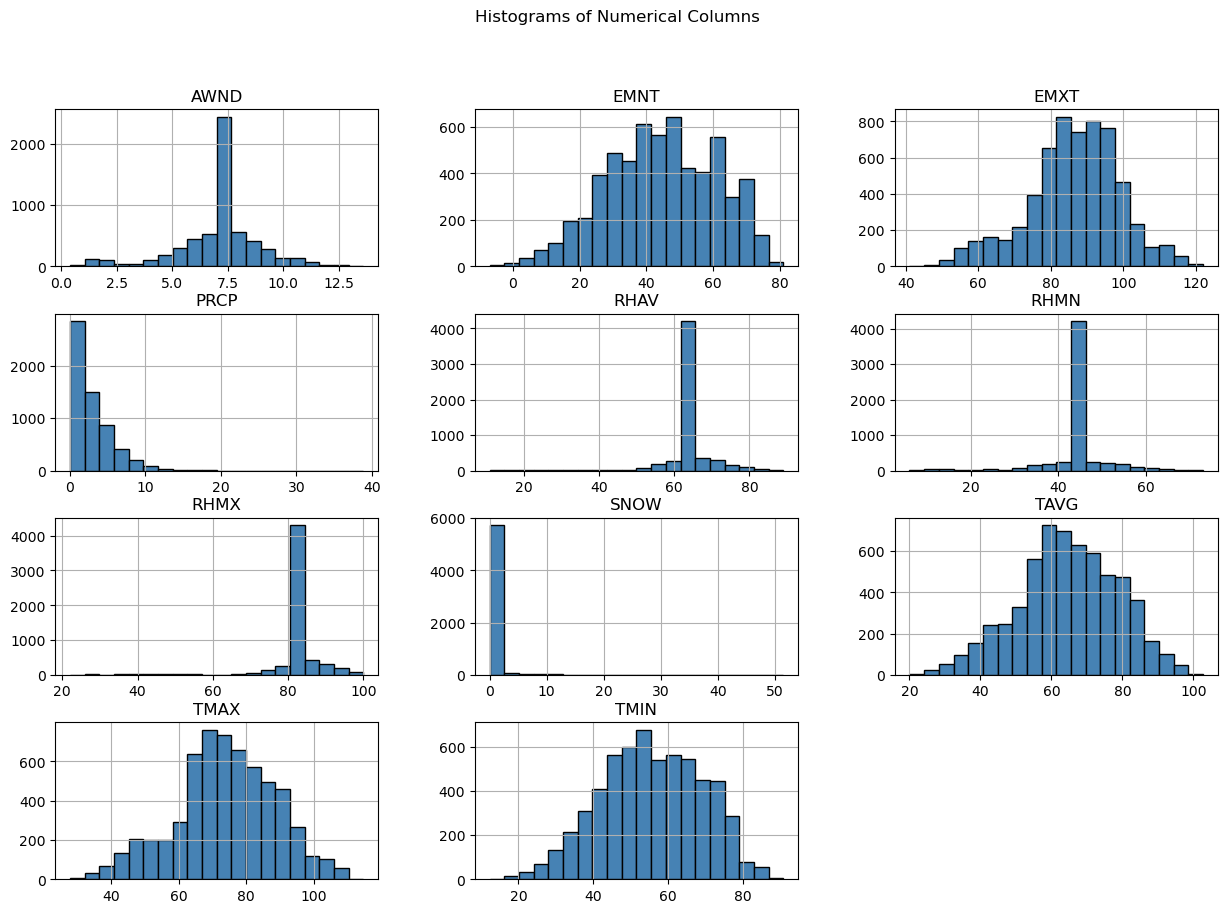

In [23]:
# Histograms for numerical columns
combined_df[numeric_columns].hist(bins=20, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [25]:
# Function to plot time series for a given city
def plot_time_series(city_name, df):
    city_df = df[df['City'] == city_name]
    city_df.set_index('DATE', inplace=True)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=city_df['TAVG'], label='Average Temperature (TAVG)', color='blue')
    sns.lineplot(data=city_df['PRCP'], label='Precipitation (PRCP)', color='orange')
    sns.lineplot(data=city_df['RHAV'], label='Average Relative Humidity (RHAV)', color='green')
    plt.title(f'Time Series Analysis for {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


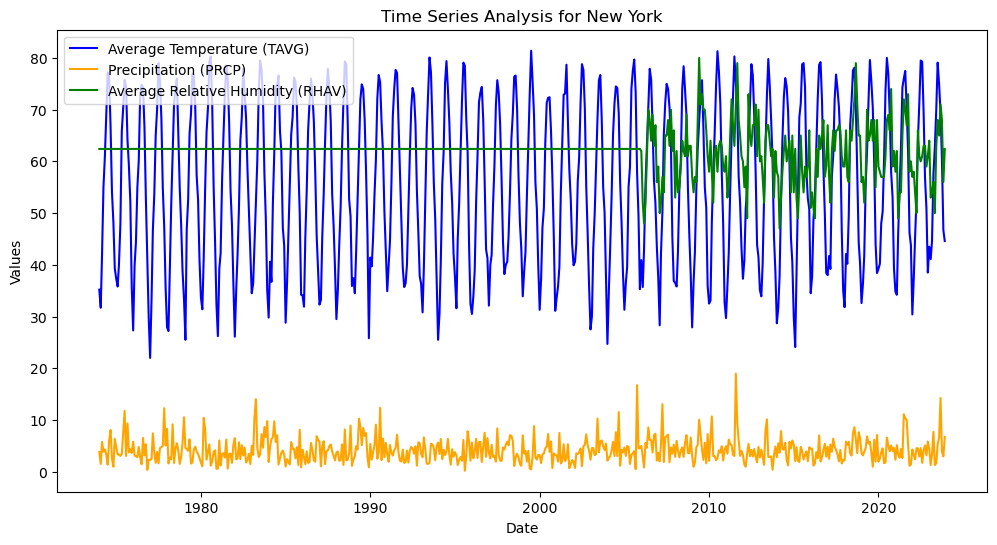

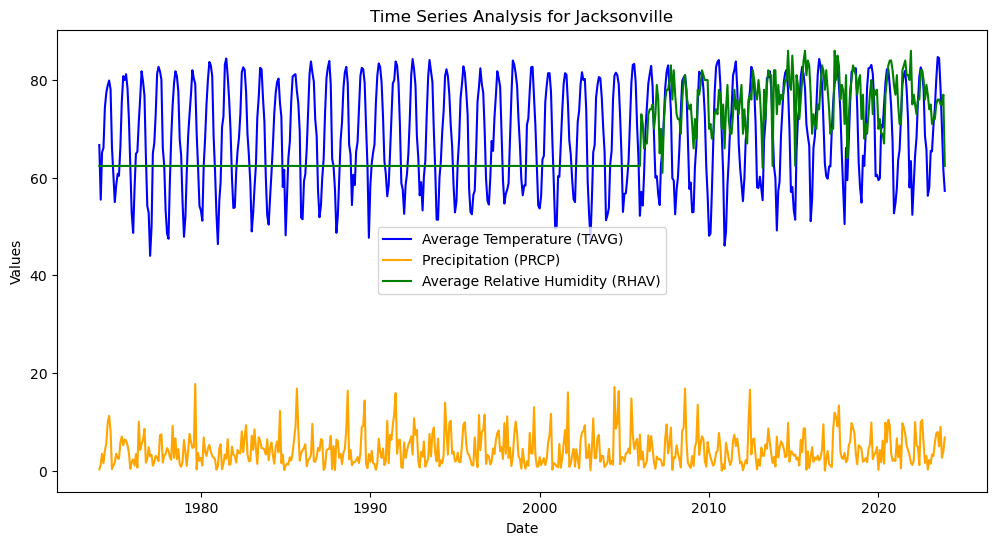

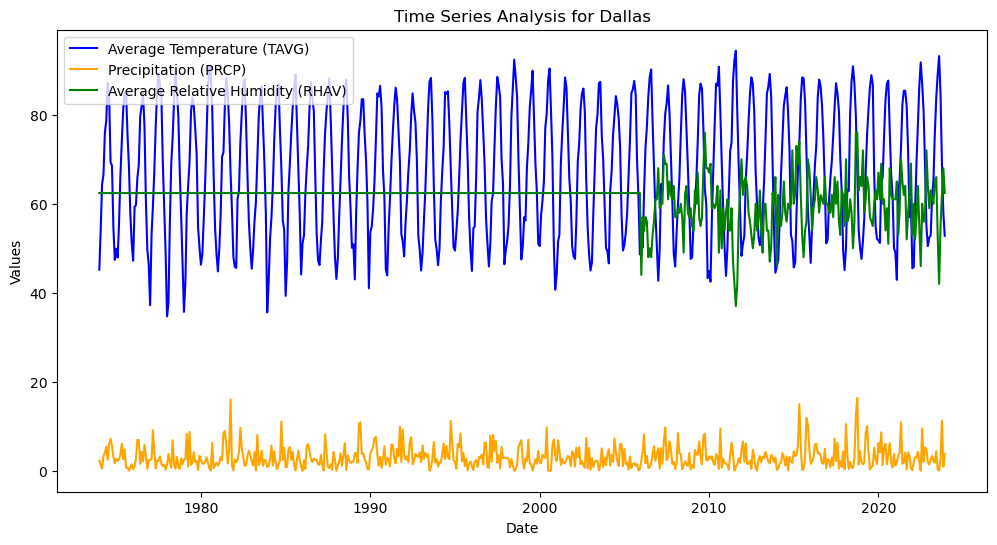

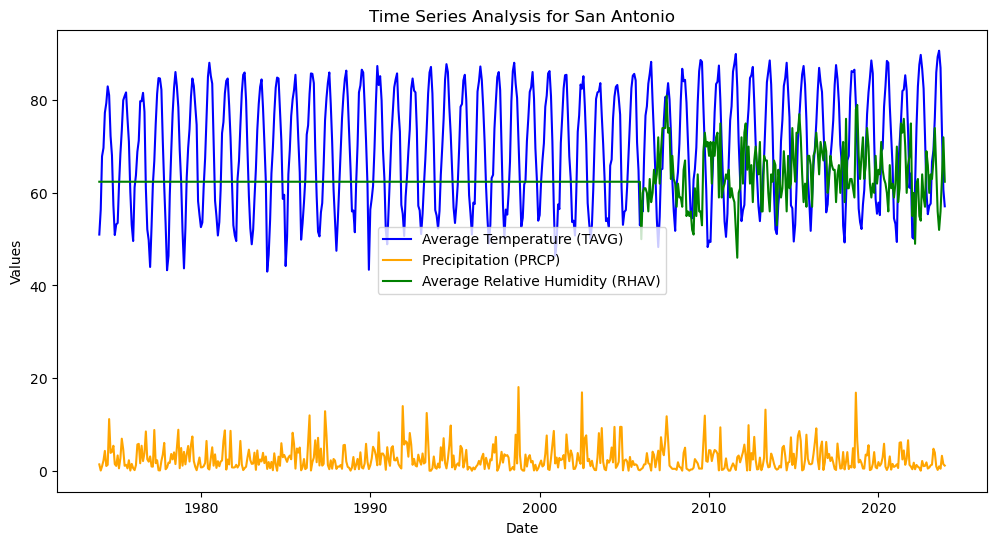

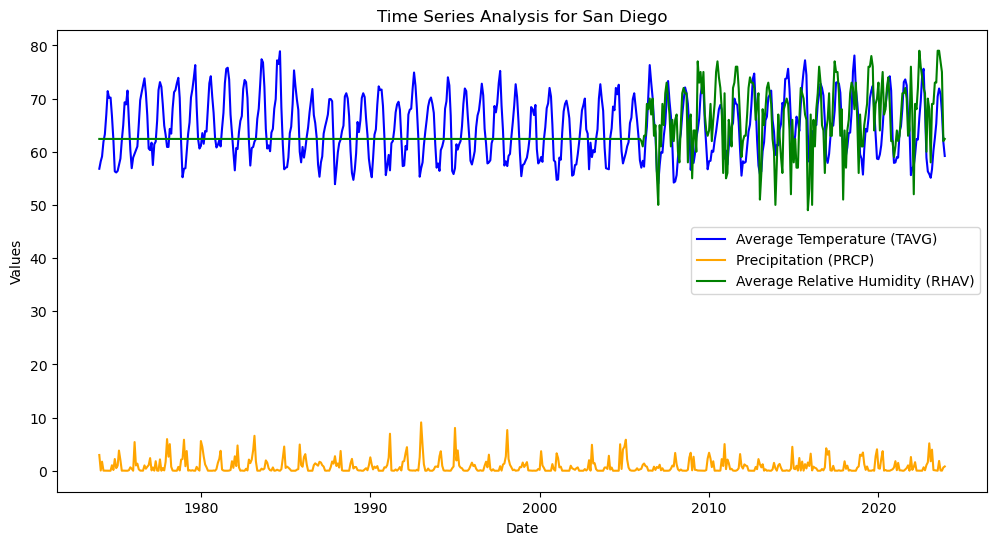

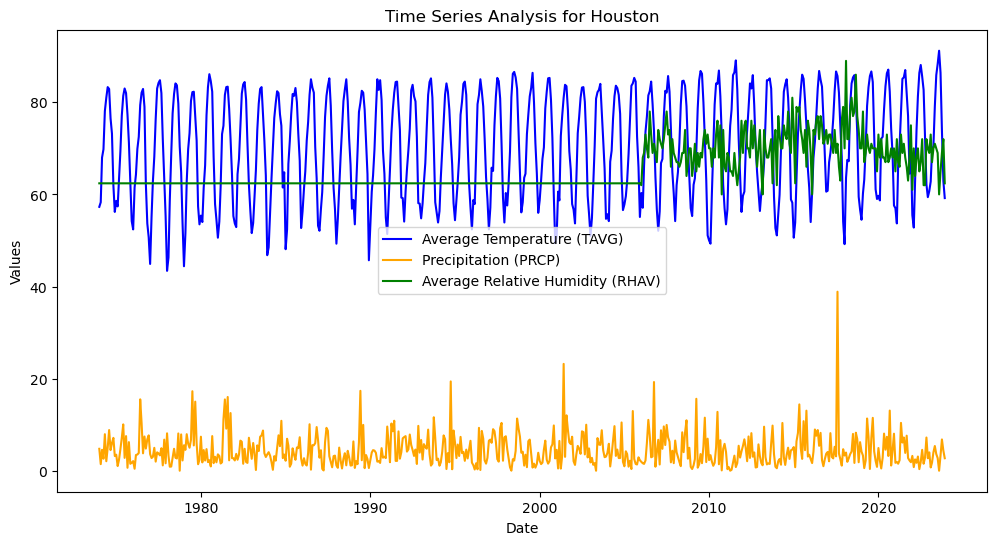

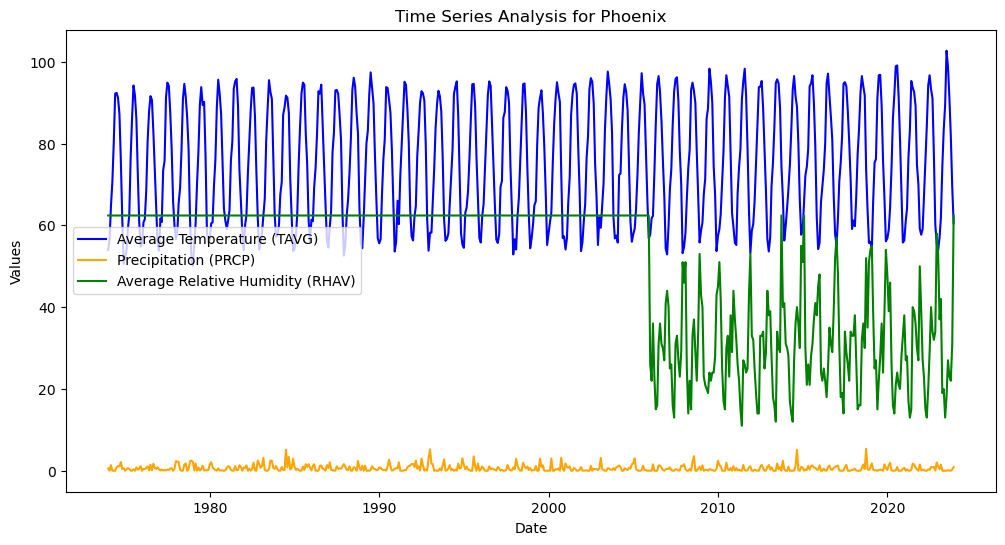

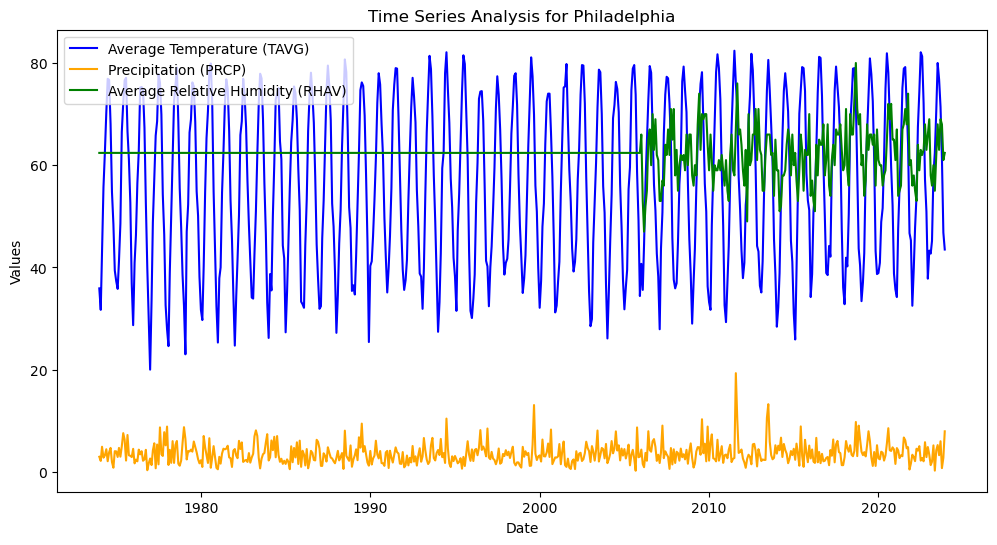

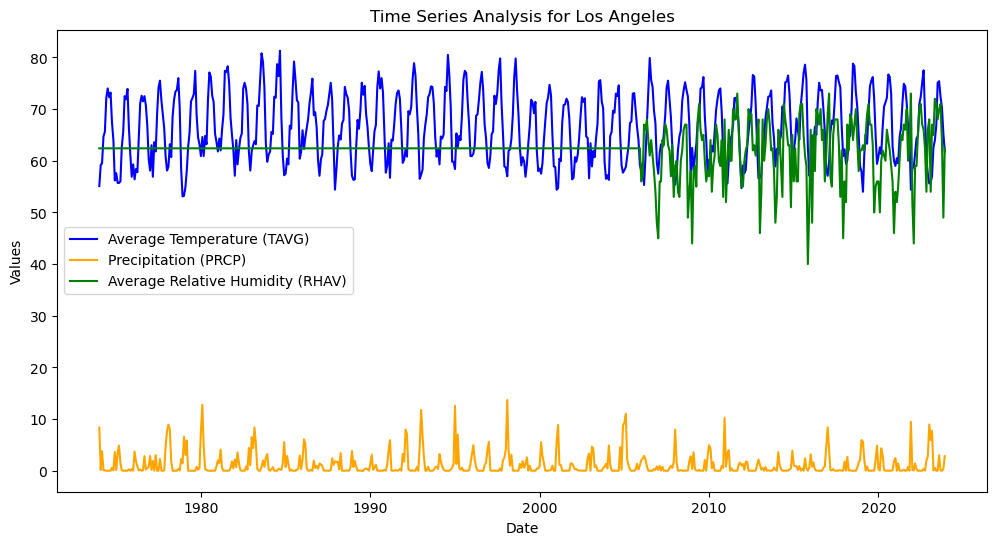

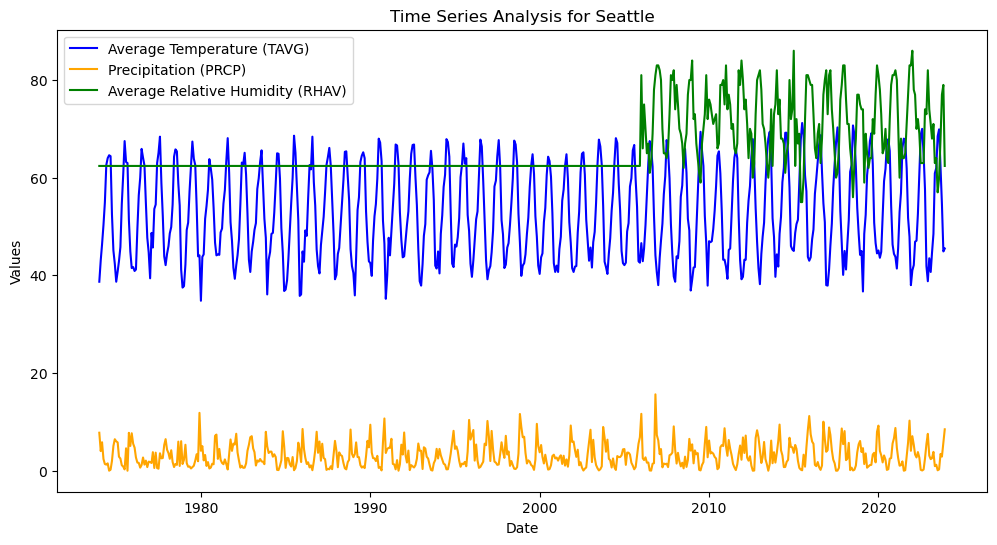

In [26]:
# Plots time series for each city
for city in cities:
    plot_time_series(city, combined_df)

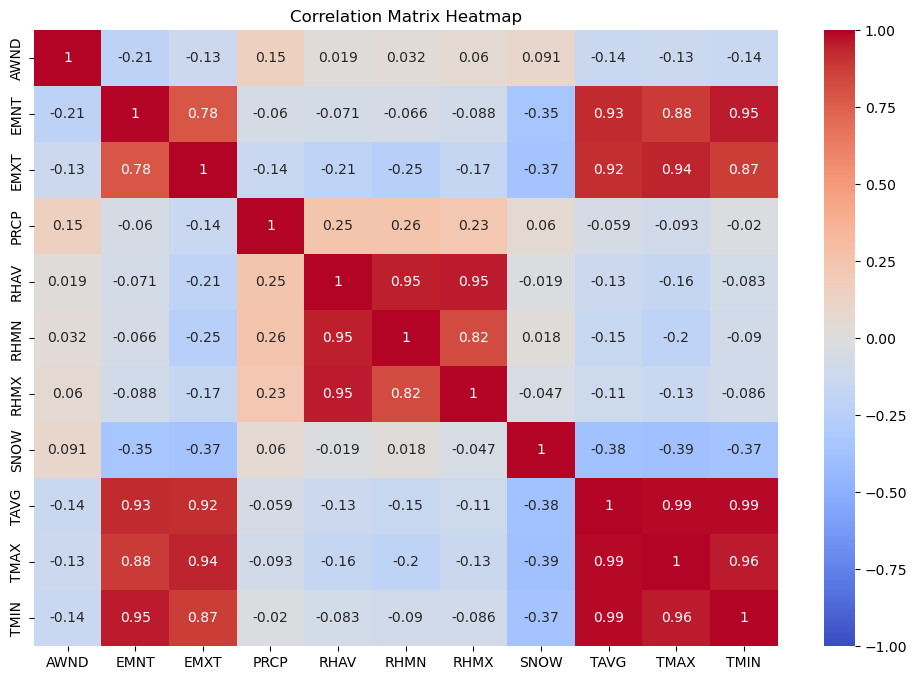

In [27]:
# 
correlation_matrix = combined_df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

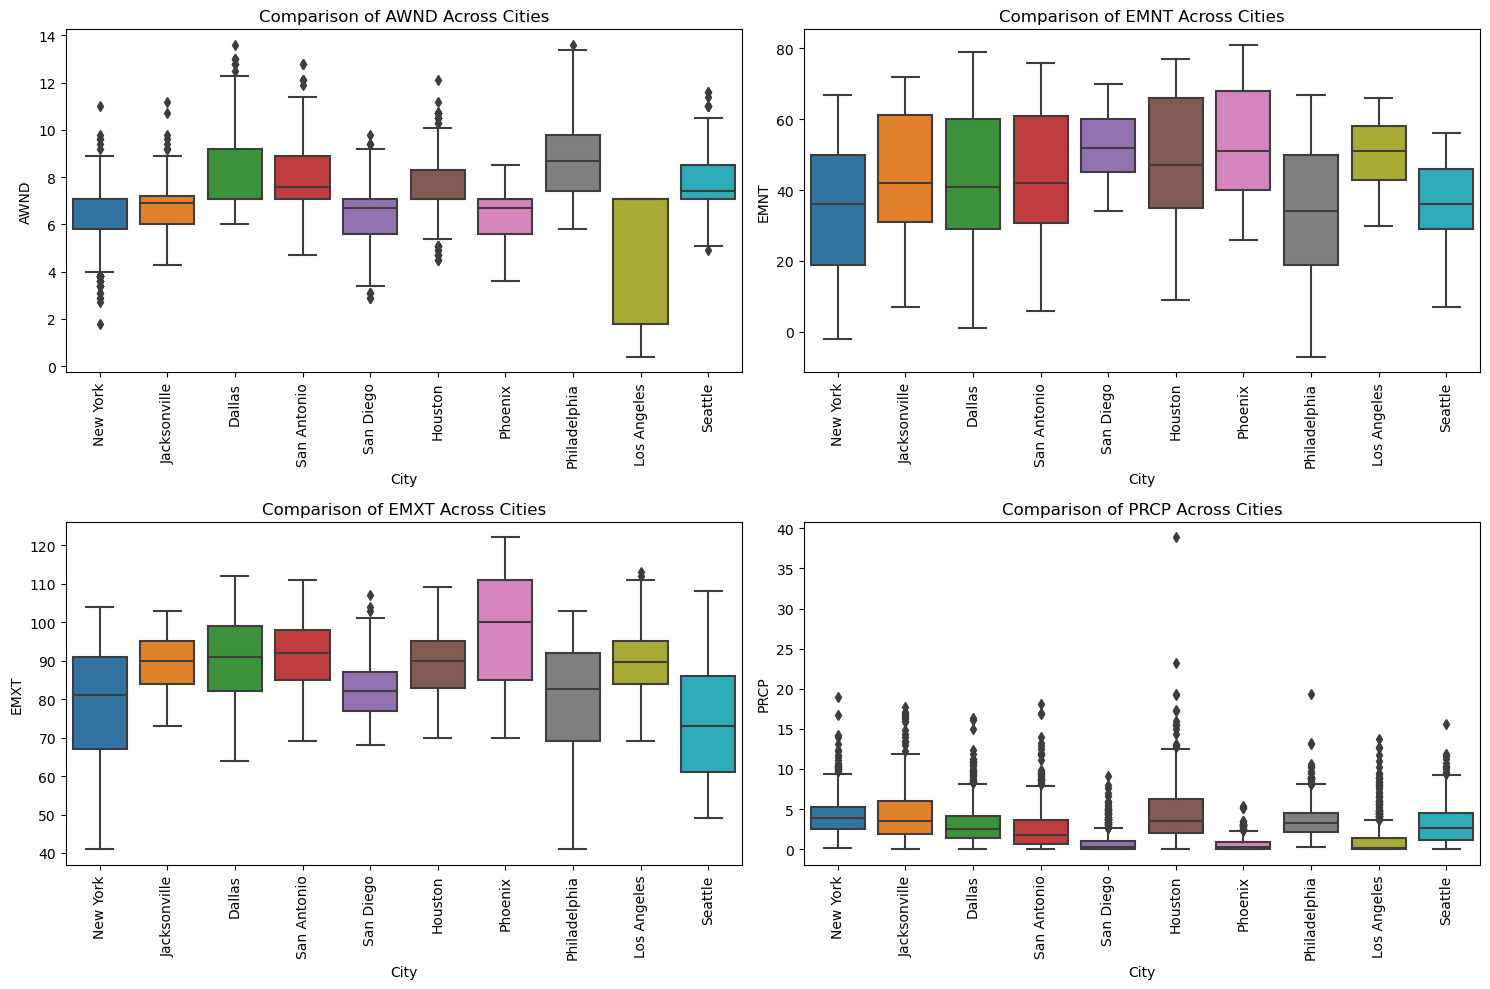

In [28]:
#
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='City', y=col, data=combined_df)
    plt.title(f'Comparison of {col} Across Cities')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()